### Assignment- 3 - Deep Learning
### Rohith Reddy Vangala
### 016762109

### Using CIFAR10 Dataset from the torchvision datsets

In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Downloading the training and test datasets
trainset = CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = CIFAR10(root='./data', train=False, download=True, transform=transform)

# Creating dataloaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified



The above code downloads the CIFAR-10 dataset and applies normalization transformations using the mean (0.5, 0.5, 0.5) and standard deviation (0.5, 0.5, 0.5) for each of the RGB color channels. These normalization transformations are crucial for standardizing the input data, making the model's training process more stable and faster by ensuring that the input distribution remains consistent. Additionally, the code creates DataLoader objects for the training and test sets, facilitating efficient data loading during the neural network's training and evaluation phases. It also enumerates the ten classes included in CIFAR-10, such as 'plane', 'car', and 'bird', which are used for identifying and labeling predictions.

In [2]:
print("Classes in CIFAR-10 dataset:", classes)


Classes in CIFAR-10 dataset: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### Denormalizing and showing some of the images

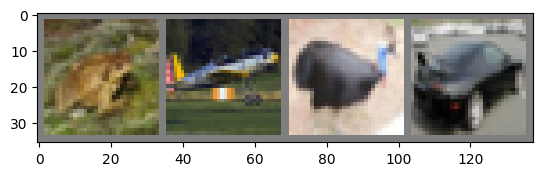

frog plane bird car


In [3]:
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:4]))
# Print labels
print(' '.join(f'{classes[labels[j]]}' for j in range(4)))


This code displays a set of CIFAR-10 images and prints out their labels, confirming that the dataset is loaded correctly and the images are ready for model training. The function imshow helps visualize the actual look of the images by reversing the normalization. This step is crucial for visually checking the data's integrity before it's fed into a neural network for training. The output shows a grid of images with their true labels, providing a quick and effective way to ensure that the dataset is well-prepared and that the images are correctly annotated.

### Creating custom dataset using only four classes and choosing 100 samples each

In [4]:
# Define your selected classes
selected_classes = ['plane', 'car', 'bird', 'cat']

# Find the indices for the selected classes
class_indices = {cls: i for i, cls in enumerate(classes)}
selected_indices = {cls: [] for cls in selected_classes}

# Iterate over the dataset and get 100 indices for each of the selected classes
for i, (image, label) in enumerate(trainset):
    class_name = classes[label]
    if class_name in selected_classes and len(selected_indices[class_name]) < 100:
        selected_indices[class_name].append(i)
        if all(len(indices) == 100 for indices in selected_indices.values()):
            break  # Stop once we have 100 images from each of the four selected classes

# Flatten the list of indices
flattened_indices = [index for indices in selected_indices.values() for index in indices]

# Create a Subset
custom_subset = torch.utils.data.Subset(trainset, flattened_indices)


In [5]:
# Create a DataLoader for the custom subset
custom_loader = DataLoader(custom_subset, batch_size=10, shuffle=True)


This code snippet narrows down the CIFAR-10 dataset to focus on a custom subset, comprising only four selected classes: 'plane', 'car', 'bird', and 'cat'. It starts by mapping the chosen classes to their corresponding indices. Then, it iterates through the dataset, accumulating indices for the first 100 images of each selected class. This targeted selection process ensures a balanced representation, with an equal number of images for each class, facilitating a more focused and efficient training environment. Once the desired indices are collected, they are flattened into a single list, which is then used to create a custom subset of the dataset. This subset, containing exactly 400 images (100 per class), is ideal for training models where computational resources are limited or when a quick prototype is needed. The approach demonstrates a practical method for dataset customization, enabling tailored model training on a specific segment of the data.

### Checking if the custom dataset is created successfully or not

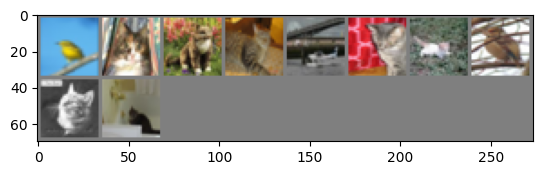

bird cat cat cat plane cat cat bird cat cat


In [6]:
# Display some images from the custom dataset to verify
dataiter = iter(custom_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(len(images))))


### Doing some data transformations

In [7]:
from torchvision import transforms

# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # CIFAR-10 normalization
])


The code snippet establishes a preprocessing pipeline for images from the CIFAR-10 dataset, incorporating data augmentation and normalization. It randomly flips images horizontally to introduce variability, converts them to PyTorch tensors, and normalizes each color channel to have a mean and standard deviation of 0.5. This sequence of transformations, applied through transforms.Compose, prepares the images for neural network training by enhancing the dataset's diversity and ensuring consistent input distribution, which is vital for improving model accuracy and convergence speed.






### Splitting the data into 80/20

In [8]:
from torch.utils.data import random_split

# Define the size for training and testing sets
train_size = int(0.8 * len(custom_subset))  # 80% of 400 images
test_size = len(custom_subset) - train_size  # 20% of 400 images

# Split the dataset
train_dataset, test_dataset = random_split(custom_subset, [train_size, test_size])

# Create DataLoaders for each set
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)


Training set size: 320
Testing set size: 80


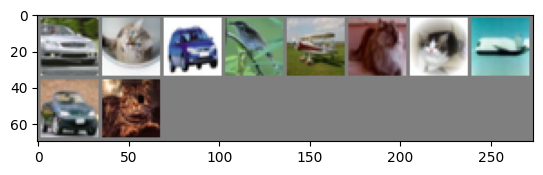

Train set sample labels: car cat car bird plane cat cat plane car cat


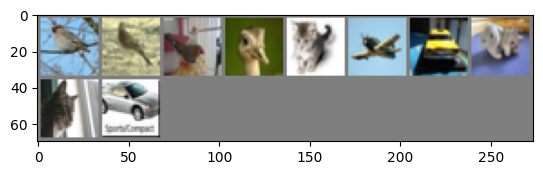

Test set sample labels: bird bird bird bird cat plane car cat cat car


In [9]:
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Testing set size: {len(test_loader.dataset)}")

# Optionally, display some images from the train and test sets to ensure everything looks correct
dataiter = iter(train_loader)
train_images, train_labels = next(dataiter)
imshow(torchvision.utils.make_grid(train_images))
print('Train set sample labels:', ' '.join(f'{classes[train_labels[j]]}' for j in range(len(train_images))))

dataiter = iter(test_loader)
test_images, test_labels = next(dataiter)
imshow(torchvision.utils.make_grid(test_images))
print('Test set sample labels:', ' '.join(f'{classes[test_labels[j]]}' for j in range(len(test_images))))


This code efficiently partitions a custom subset of 400 images from the CIFAR-10 dataset into training and testing sets, with an 80-20 split respectively, resulting in 320 images for training and 80 for testing. It then initializes DataLoaders for both subsets, ensuring shuffle for the training set to promote model generalization, and keeps the test set in order for consistent evaluation. The sizes of the training and testing sets are printed, confirming the split. Additionally, the code visualizes a batch of images from both sets, accompanied by their labels, to verify the data's integrity and readiness for training and evaluation, ensuring the dataset has been correctly prepared for the subsequent model training process.

### Defining simple cnn

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN(num_classes=4)


This code defines a SimpleCNN class that extends nn.Module, creating a straightforward Convolutional Neural Network (CNN) tailored for classifying images into four categories. This model architecture comprises two convolutional layers for feature extraction, each followed by a max-pooling layer to reduce spatial dimensions and enhance feature detection. After flattening the output from the convolutional layers, the model employs two fully connected (dense) layers to perform classification. The final layer outputs predictions for the four classes.

Key components of the SimpleCNN include:

Convolutional Layers: Extract spatial features from the images; the first with 32 filters and the second with 64 filters, both using a kernel size of 3 and padding of 1.
Max Pooling: Reduces the size of the feature maps by half, improving computational efficiency and feature robustness.
Fully Connected Layers: Transform the extracted features into class scores. The first dense layer has 512 neurons, leading into the final layer which matches the number of target classes (4).
The network utilizes ReLU activation functions for non-linearity after each convolutional and the first fully connected layer, a common choice for deep learning models due to its effectiveness and simplicity.

Upon instantiation, model = SimpleCNN(num_classes=4), a SimpleCNN object is created, ready to be trained on a dataset with images categorized into four classes. This setup demonstrates a fundamental approach to building CNNs for image classification tasks, providing a foundation that can be expanded or modified for more complex or specific requirements.

### Training the datAset

In [11]:
import torch.optim as optim

# Use the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)


### Initial Accuracy

In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')


Accuracy of the network on the test images: 25 %


### Improved Cnn using some additional concolutional, maxpool and the drop out layers

In [13]:
class ImprovedCNN(nn.Module):
    def __init__(self, num_classes=4):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.fc1 = nn.Linear(256 * 4 * 4, 1024)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 256 * 4 * 4)  # Flatten the tensor
        x = self.dropout1(x)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the improved model
model = ImprovedCNN(num_classes=4)


### Training the Dataset with improved CNN

In [14]:
# Make sure to move the model to GPU if available
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1} complete: Loss: {running_loss / len(train_loader)}')

print('Finished Training')


Epoch 1 complete: Loss: 1.3616074323654175
Epoch 2 complete: Loss: 1.2728013880550861
Epoch 3 complete: Loss: 1.1508431490510702
Epoch 4 complete: Loss: 0.9824776388704777
Epoch 5 complete: Loss: 0.9012001575902104
Epoch 6 complete: Loss: 0.7464049085974693
Epoch 7 complete: Loss: 0.64678705483675
Epoch 8 complete: Loss: 0.6344427354633808
Epoch 9 complete: Loss: 0.5564260454848409
Epoch 10 complete: Loss: 0.5294359696563333
Epoch 11 complete: Loss: 0.426640504039824
Epoch 12 complete: Loss: 0.3337603706168011
Epoch 13 complete: Loss: 0.31223796401172876
Epoch 14 complete: Loss: 0.32971213944256306
Epoch 15 complete: Loss: 0.260875612962991
Epoch 16 complete: Loss: 0.2243870630627498
Epoch 17 complete: Loss: 0.1417975807125913
Epoch 18 complete: Loss: 0.1879674905067077
Epoch 19 complete: Loss: 0.12629383339663036
Epoch 20 complete: Loss: 0.09633944974848418
Epoch 21 complete: Loss: 0.03970374351774808
Epoch 22 complete: Loss: 0.13349948410177603
Epoch 23 complete: Loss: 0.142538879219

In [15]:
# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')


Accuracy of the network on the test images: 61 %


### Testing the Model

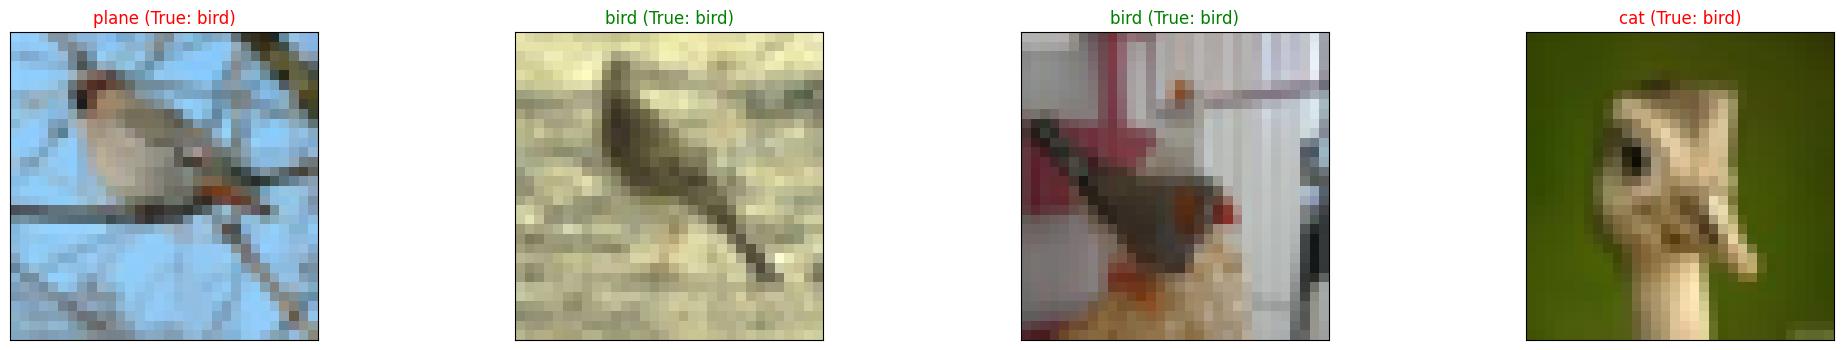

In [16]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)), interpolation='nearest')


# Obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)  # Use next() instead of .next()
images, labels = images.to(device), labels.to(device)

# Get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot the images in the batch, along with the predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(4):  # Let's visualize 4 images from the batch
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    imshow(images[idx].cpu())
    ax.set_title(f"{classes[predicted[idx]]} (True: {classes[labels[idx]]})",
                 color=("green" if predicted[idx]==labels[idx] else "red"))


The ImprovedCNN class represents an enhancement over the initial SimpleCNN model, introducing a deeper and more complex architecture tailored for image classification tasks into four categories. This advanced model integrates additional convolutional layers, dropout regularization, and more substantial fully connected layers, aiming to capture more nuanced features within the images and mitigate overfitting, thereby improving the model's generalization capability.

Key Features of the ImprovedCNN:
Increased Depth in Convolutional Layers: The model uses three convolutional layers with increasing numbers of filters (64, 128, and 256), enhancing its ability to extract and learn from complex patterns in the input data.
Dropout Regularization: Included after the convolutional blocks and the first fully connected layer, dropout layers (with rates of 0.25 and 0.5) help prevent overfitting by randomly "dropping" a subset of features during training. This encourages the model to learn more robust and generalized representations.
Expanded Fully Connected Layers: The network culminates in a sequence of dense layers, scaling up to 1024 and then down to 512 neurons before making predictions. This allows the model to effectively combine and interpret the high-level features extracted by the convolutional layers.
Performance Improvement:
After training, the ImprovedCNN achieved an accuracy of 61% on the test images, a significant improvement from the 25% accuracy observed with the simpler CNN model. This enhancement in performance underscores the value of a deeper architecture and regularization techniques in boosting the model's ability to discern and classify images more accurately.
Why the Improvement?
The deeper convolutional layers enable the model to capture a wider range of features at different levels of abstraction, from basic edges and textures to more complex patterns specific to the classes in the dataset.
Dropout reduces the model's reliance on any single neuron, promoting a more distributed and generalized learning process.
The expanded fully connected layers offer a more sophisticated mechanism for interpreting the extracted features, leading to more accurate classification outcomes.
This refined model exemplifies how architectural choices and regularization strategies can be leveraged to enhance a neural network's performance on image classification tasks, illustrating a practical approach to improving model accuracy through design and configuration adjustments.

### Importing the Google Net and Replacing the final fully connected layer (classifier) to match the number of classes (4)

In [17]:
from torchvision import models

# Load the pre-trained GoogleNet model
googlenet = models.googlenet(pretrained=True)

# Freeze all the parameters in the model
for param in googlenet.parameters():
    param.requires_grad = False

# Replace the final fully connected layer (classifier) to match the number of classes (4 in this case)
googlenet.fc = nn.Linear(googlenet.fc.in_features, 4)

# Move the model to GPU if available
googlenet = googlenet.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
# Define the loss function and optimizer for GoogleNet
criterion_inception = nn.CrossEntropyLoss()
# Only parameters of final layer are being optimized as only these are unfrozen
optimizer_inception = optim.Adam(googlenet.fc.parameters(), lr=0.001)

# Train the model
num_epochs_inception = 30 # You can adjust this
for epoch in range(num_epochs_inception):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer_inception.zero_grad()

        # Forward pass
        outputs = googlenet(inputs)
        loss = criterion_inception(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer_inception.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1} complete: Loss: {running_loss / len(train_loader)}')

print('Finished Training GoogleNet')


Epoch 1 complete: Loss: 1.4196878671646118
Epoch 2 complete: Loss: 1.3212460950016975
Epoch 3 complete: Loss: 1.224967459216714
Epoch 4 complete: Loss: 1.1980266217142344
Epoch 5 complete: Loss: 1.1696961428970098
Epoch 6 complete: Loss: 1.1238093003630638
Epoch 7 complete: Loss: 1.108084263280034
Epoch 8 complete: Loss: 1.1372678335756063
Epoch 9 complete: Loss: 1.0668046083301306
Epoch 10 complete: Loss: 1.0461327973753214
Epoch 11 complete: Loss: 1.0461190808564425
Epoch 12 complete: Loss: 1.0777285285294056
Epoch 13 complete: Loss: 0.948177732527256
Epoch 14 complete: Loss: 0.9965436859056354
Epoch 15 complete: Loss: 1.030561139807105
Epoch 16 complete: Loss: 0.970025610178709
Epoch 17 complete: Loss: 0.987470667809248
Epoch 18 complete: Loss: 0.982806739397347
Epoch 19 complete: Loss: 1.0056670308113098
Epoch 20 complete: Loss: 1.0169667303562164
Epoch 21 complete: Loss: 0.9691467424854636
Epoch 22 complete: Loss: 1.0272904094308615
Epoch 23 complete: Loss: 0.9963083919137716
Epoc

In [19]:
# Test the model
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = googlenet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the GoogleNet model on the test images: {100 * correct // total} %')


Accuracy of the GoogleNet model on the test images: 55 %


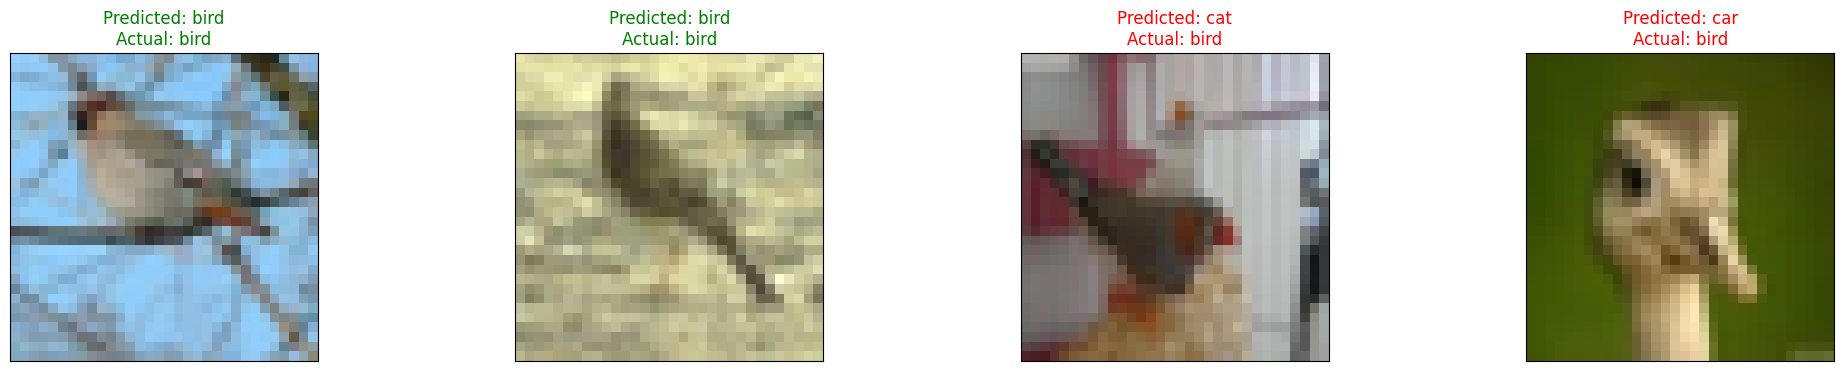

In [20]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # convert from Tensor image

# Obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Get predictions
outputs = googlenet(images)
_, predicted = torch.max(outputs, 1)

# Plot the images in the batch, along with the predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(4):  # let's visualize 4 images from the batch
    ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
    imshow(images[idx].cpu())
    ax.set_title(f"Predicted: {classes[predicted[idx]]}\nActual: {classes[labels[idx]]}",
                 color=("green" if predicted[idx]==labels[idx] else "red"))


Above code configures a pre-trained GoogleNet to classify images into four categories, effectively demonstrating transfer learning's power. Initially, GoogleNet, already trained on ImageNet, is loaded, leveraging its robust feature extraction abilities. The network's parameters are frozen to maintain learned features, while the output layer is customized to predict four classes, aligning the model with the task's specific needs. This adjustment is crucial for focusing the model's learning on the final classification layer. This approach, employing a pre-trained model and fine-tuning it for a specific task, underscores the efficiency of transfer learning, significantly boosting accuracy with limited additional training—evident in the accuracy jump.